<a href="https://colab.research.google.com/github/jayV1999/Capstone-Project/blob/main/Global_Terrorism_Analysis_Jayanth_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
#Importing the necessary Libraries for our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting google drive for getting our Dataset 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the dataset and storing it as a dataframe
path = '/content/drive/MyDrive/Global Terrorism Data.csv'
terror_attack_df = pd.read_csv(path,encoding="ISO-8859-1")

In [ ]:
#General overview of our dataset
terror_attack_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#Getting some insights from the dataset
terror_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#Interpreting the statistical data of the dataframe

terror_attack_df.describe(include='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


Since we have the raw data in our hand it is time for us to first start cleaning the data.

**Let's start of by dropping the columns with most null values present in them**

In [ ]:
terror_attack_df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

**% of null values in every column**

In [ ]:
#Checking the columns whether it is null and calculating it's percentage.

null_values = terror_attack_df.isnull().sum()/terror_attack_df.shape[0]*100
print(null_values)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64


In [ ]:
#Getting the names of those columns having null values more than 10%

drop_column = null_values[null_values>10].keys() 

**Dropping the columns which has null values more than 10%**

In [ ]:
terror_attack_df_new = terror_attack_df.drop(columns=drop_column)
terror_attack_df_new

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weaptype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,Unknown,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,Unknown,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,Unknown,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Explosives,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,Incendiary,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Firearms,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Explosives,2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Incendiary,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Explosives,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [ ]:
terror_attack_df_new.drop(columns='eventid',inplace=True) #Droping the eventid column since we find it of no use

In [ ]:
#displaying the columns that we want to drop
terror_attack_df_new.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1',
       'individual', 'weaptype1', 'weaptype1_txt', 'nkill', 'nwound',
       'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

In [ ]:
#Dropping unwanted columns
column_name = ['provstate','natlty1','natlty1_txt','property','ishostkid','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','doubtterr','vicinity','crit1','crit2','crit3','individual',
                         'multiple','specificity','guncertain1','weaptype1','country','region','attacktype1','targtype1','targsubtype1','extended']
terror_attack_df_new.drop(columns=column_name,inplace=True)

In [ ]:
terror_attack_df_new.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city',
       'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt',
       'targtype1_txt', 'targsubtype1_txt', 'target1', 'gname',
       'weaptype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [ ]:
terror_attack_df_new.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,Incendiary,NaN,NaN


**The null value columns after cleaning the dataframe are much needed for our further analysis**

In [ ]:
terror_attack_df_new.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
city                  434
latitude             4556
longitude            4557
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
targsubtype1_txt    10373
target1               636
gname                   0
weaptype1_txt           0
nkill               10313
nwound              16311
dtype: int64

In [ ]:
#Checking the total column that we possess for our analysis
list(terror_attack_df_new.columns)

['iyear',
 'imonth',
 'iday',
 'country_txt',
 'region_txt',
 'city',
 'latitude',
 'longitude',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'target1',
 'gname',
 'weaptype1_txt',
 'nkill',
 'nwound']

In [ ]:
corr_data = terror_attack_df_new.corr()

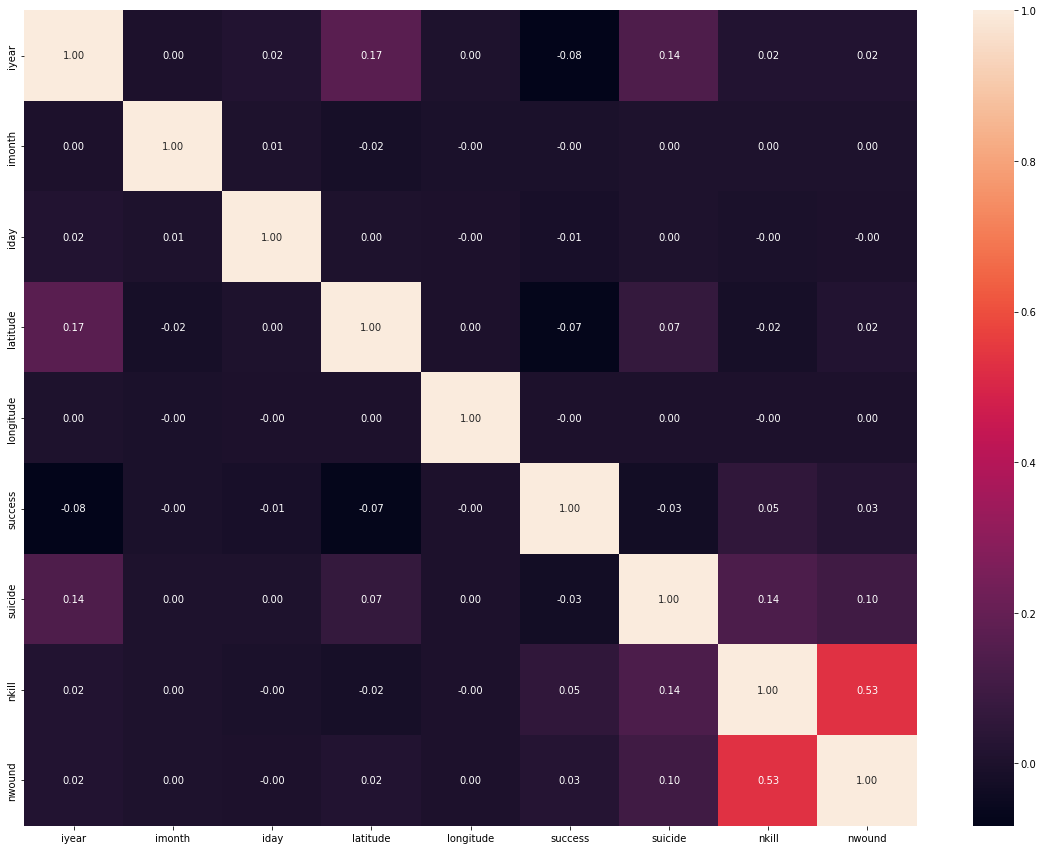

In [ ]:
# extrtaction of heat map

plt.figure(figsize=(20,15))
sns.heatmap(corr_data,fmt='.2f',annot=True)


**Now we have cleaned dataset with no null values and analysis of dataset starts here**

**The Below Analysis is done on the year in which most attacks took place**

In [ ]:
#The years in which the Attacks took place the most

terror_attack_df_new['iyear'].value_counts().reset_index().rename(columns={"index":"year","iyear": "no.of times"})

,year,no.of times
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


In [ ]:
#finding top 10 years with most terrorist attacks 
terror_attack_df_new['iyear'].value_counts().reset_index().rename(columns={'index':'year','iyear':'Number of terrorist attacks'})[0:10]

,year,Number of terrorist attacks
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


In [ ]:
#finding last and lowest 10 years with terrorist attacks
terror_attack_df_new['iyear'].value_counts().tail(10).reset_index().rename(columns={'index':'year','iyear':'Number of terrorist attacks'})[0:10]

,year,Number of terrorist attacks
0,2003,1278
1,2004,1166
2,1998,934
3,1976,923
4,1975,740
5,1970,651
6,1974,581
7,1972,568
8,1973,473
9,1971,471


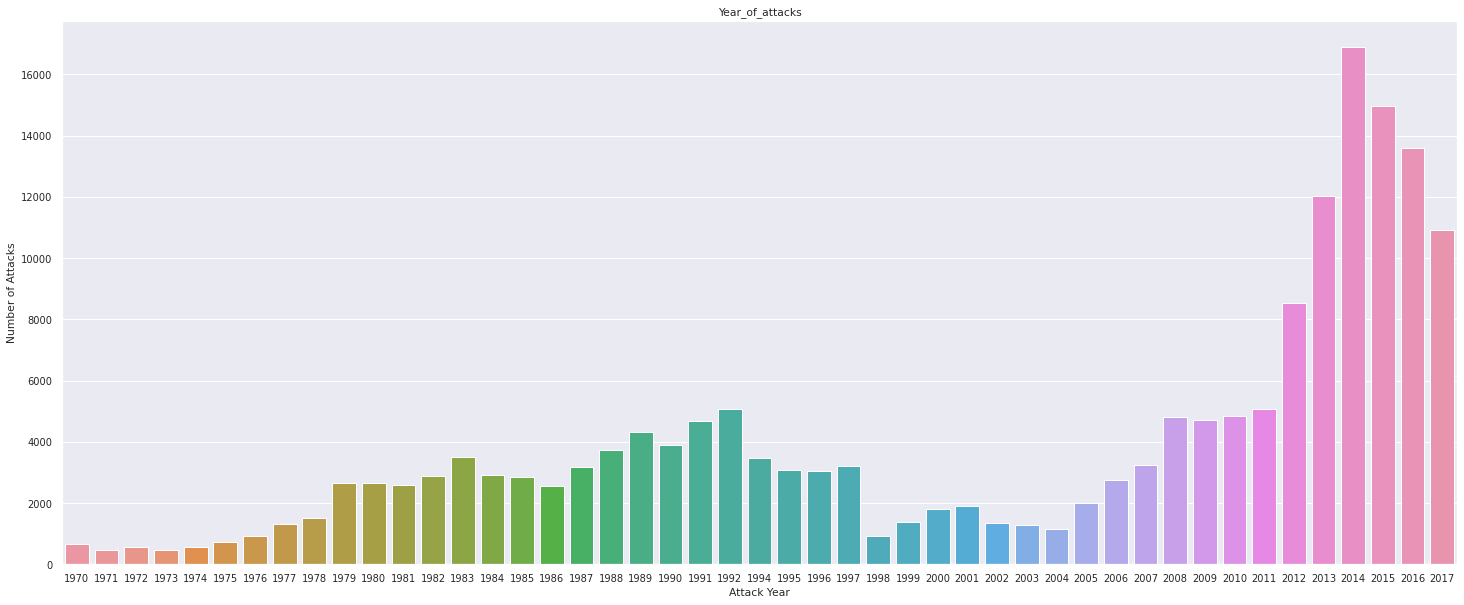

In [ ]:
#Plotting the year and attacks in a graph for visual representation

x_year = terror_attack_df_new['iyear'].unique()
y_count_years = terror_attack_df_new['iyear'].value_counts().sort_index()
plt.figure(figsize = (25,10))
sns.color_palette("hls", 8)
sns.set(font_scale = 0.9)
sns.barplot(x = x_year,y = y_count_years)
plt.title('Year_of_attacks')
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks')
plt.show()

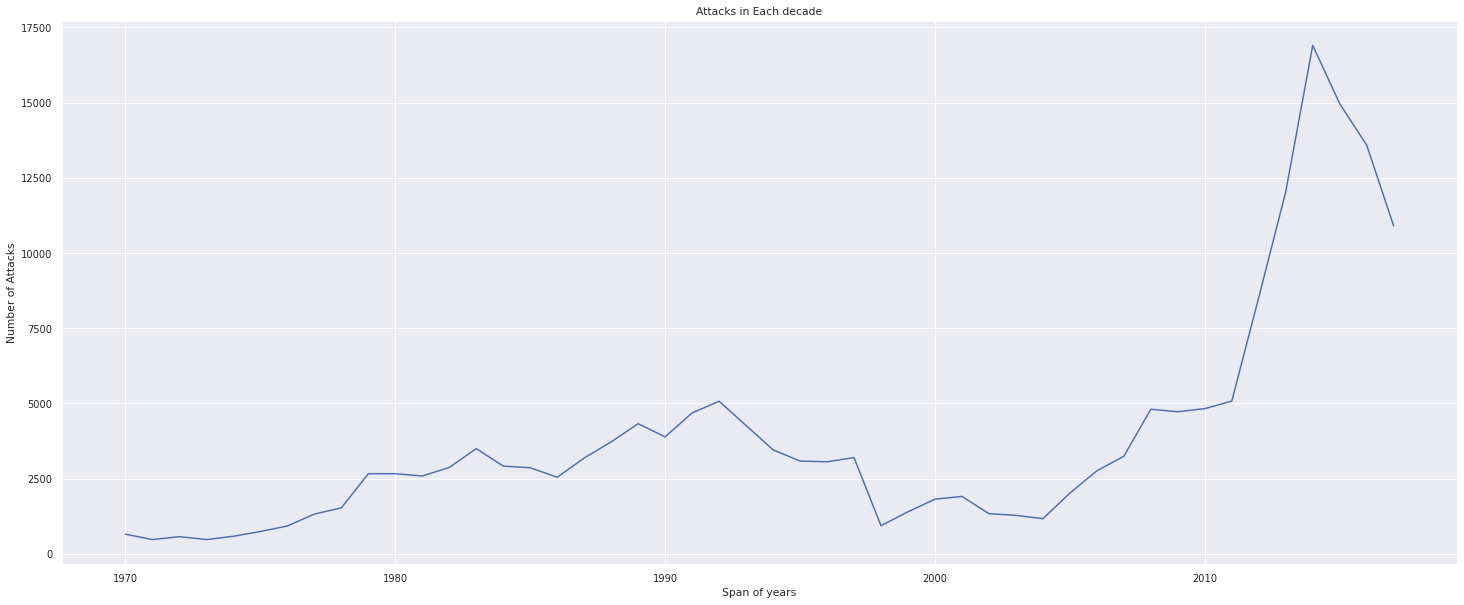

In [ ]:
#Line plot of year wise attacks

x_year = terror_attack_df_new['iyear'].unique()
y_count_years = terror_attack_df_new['iyear'].value_counts().sort_index()
plt.figure(figsize = (25,10))
sns.color_palette("hls", 8)
sns.lineplot(x = x_year,y = y_count_years)
plt.title('Attacks in Each decade')
plt.xlabel('Span of years')
plt.ylabel('Number of Attacks')
plt.show()

From the figure displayed above we infer that the number of attacks took place in the year **2014**  was around **16903** which is the highest and the lowest rates of attacking happened in the year **1970** which was **471**.

The gragh shows that there is a huge spike in the number of attacks after the year 2010

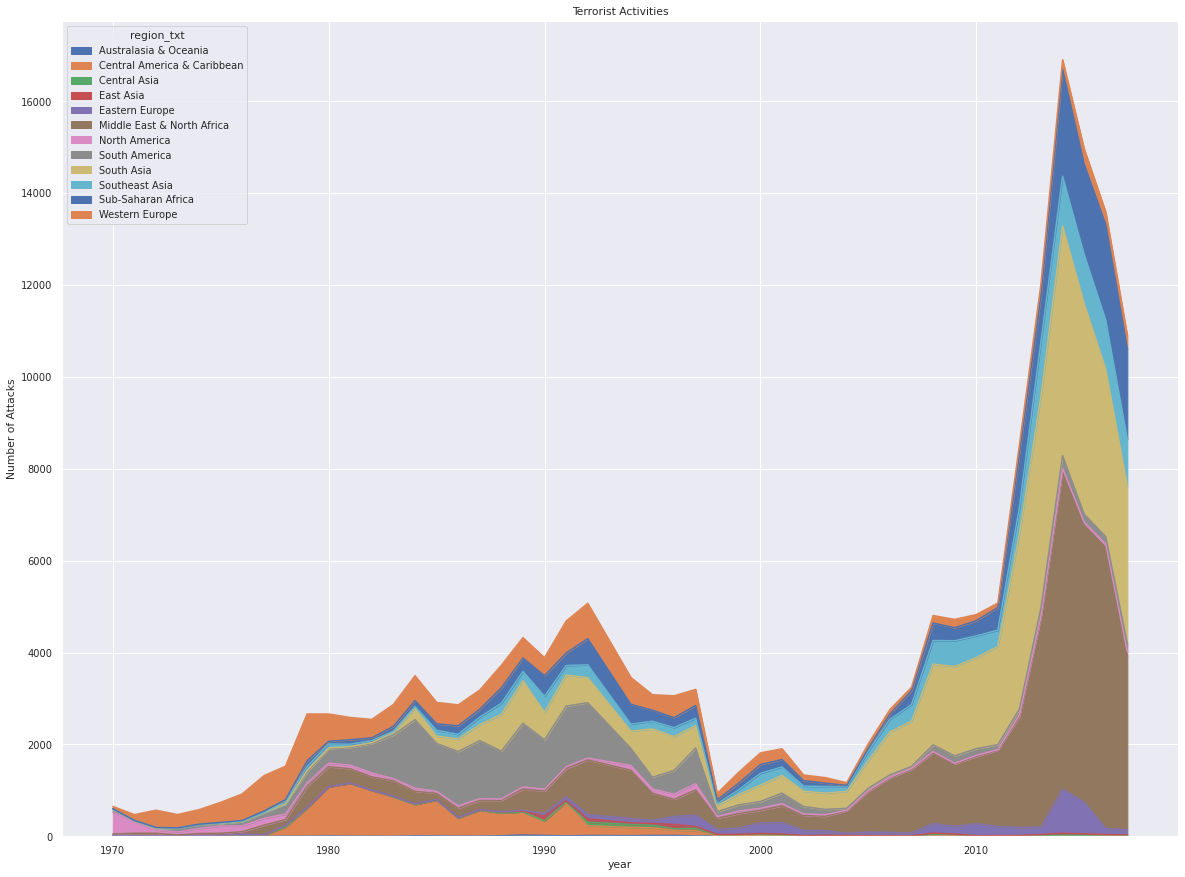

In [ ]:
pd.crosstab(terror_attack_df_new.iyear,terror_attack_df_new.region_txt).plot(kind='area',figsize=(20,15))
plt.title('Terrorist Activities')
plt.ylabel('Number of Attacks')
plt.xlabel('year')
plt.show()

**The above Graph shows the Region wise attacks taken place in the consecutive years from 1970 to 2014**

**Finding the insights about the terrorist groups involved in all the attacks**

In [ ]:
new_df = terror_attack_df_new['gname'].value_counts().reset_index().rename(columns={'index':'Organisation','gname':'No of Attacks'})[0:10]

In [ ]:
new_df.head()

,Organisation,No of Attacks
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351


In [ ]:
#counting the values of gname and finding the top 10 terrorist groups
sample = terror_attack_df_new['gname'].value_counts().reset_index().rename(columns={'index':'terrorist organization','gname':'no of attacks'})[0:10]
sample.max()

terrorist organization    Unknown
no of attacks               82782
dtype: object

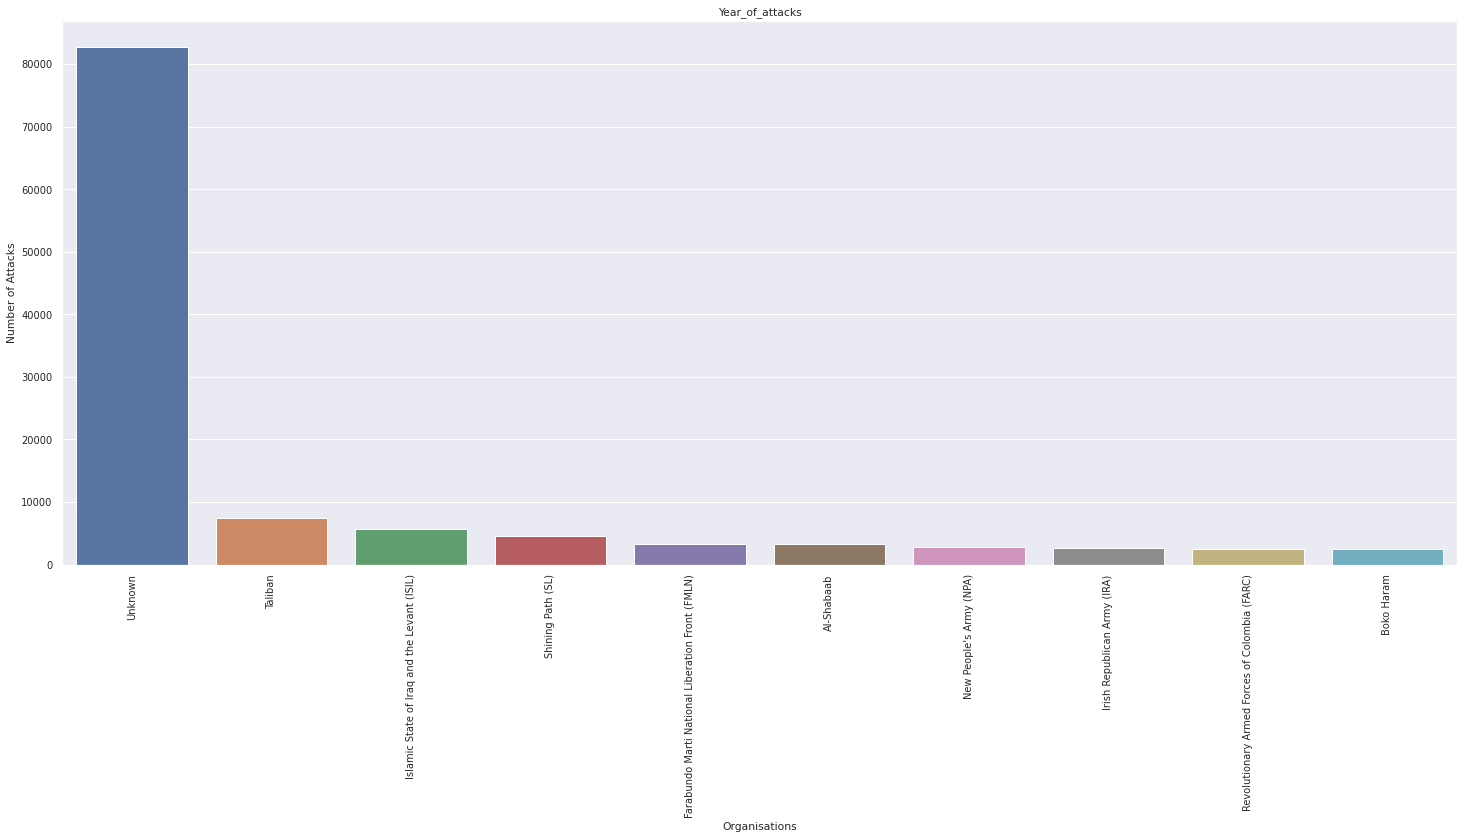

In [ ]:

x_organisation = new_df['Organisation']
y_Number_Attacks = new_df['No of Attacks'].sort_index()
plt.figure(figsize = (25,10))
sns.set(font_scale = 0.9)
sns.barplot(x = x_organisation,y = y_Number_Attacks)
plt.title('Year_of_attacks')
plt.xlabel('Organisations')
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.show()

From the above analysis and plotting we can infer that Unknown group is the one which has done the most number of attacks 82728 with **Taliban** in the 2nd place of **7478** attacks

**Analysis of countries in which terrorist attacks held.**

In [ ]:
#Top 10 countries taliban has attacked

terror_attack_df_new[terror_attack_df_new['gname'] == 'Taliban'][0:10]['country_txt']

59040    Afghanistan
60014    Afghanistan
60462    Afghanistan
60786    Afghanistan
71682    Afghanistan
72776    Afghanistan
73116    Afghanistan
73184    Afghanistan
73971    Afghanistan
74043    Afghanistan
Name: country_txt, dtype: object

In [ ]:
terror_attack_df_new.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city',
       'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt',
       'targtype1_txt', 'targsubtype1_txt', 'target1', 'gname',
       'weaptype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [ ]:
#Top 10 countries with most attacks
terror_attack_df_new['country_txt'].value_counts().reset_index().rename(columns={'index':'Countries','country_txt':'No of Attacks'})[0:10]

,Countries,No of Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


Through this we can find that **Iraq** has been the country with the most number of attacks i.e **24636**

In [ ]:
#least 10 countries with less number of attacks
terror_attack_df_new['country_txt'].value_counts().reset_index().tail(10).rename(columns={'index':'Countries','country_txt':'No of Attacks'})[0:10]

,Countries,No of Attacks
195,Vatican City,1
196,Falkland Islands,1
197,St. Lucia,1
198,North Korea,1
199,New Hebrides,1
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1
204,Antigua and Barbuda,1


Vatican City, Falkland Islands , St. Lucia, North Korea, New Hebrides ,International, Wallis and Futuna, South Vietnam, Andorra, Antigua and Barbuda are the lowest ten countries with minimum of number of attacks i.e **1 attack**

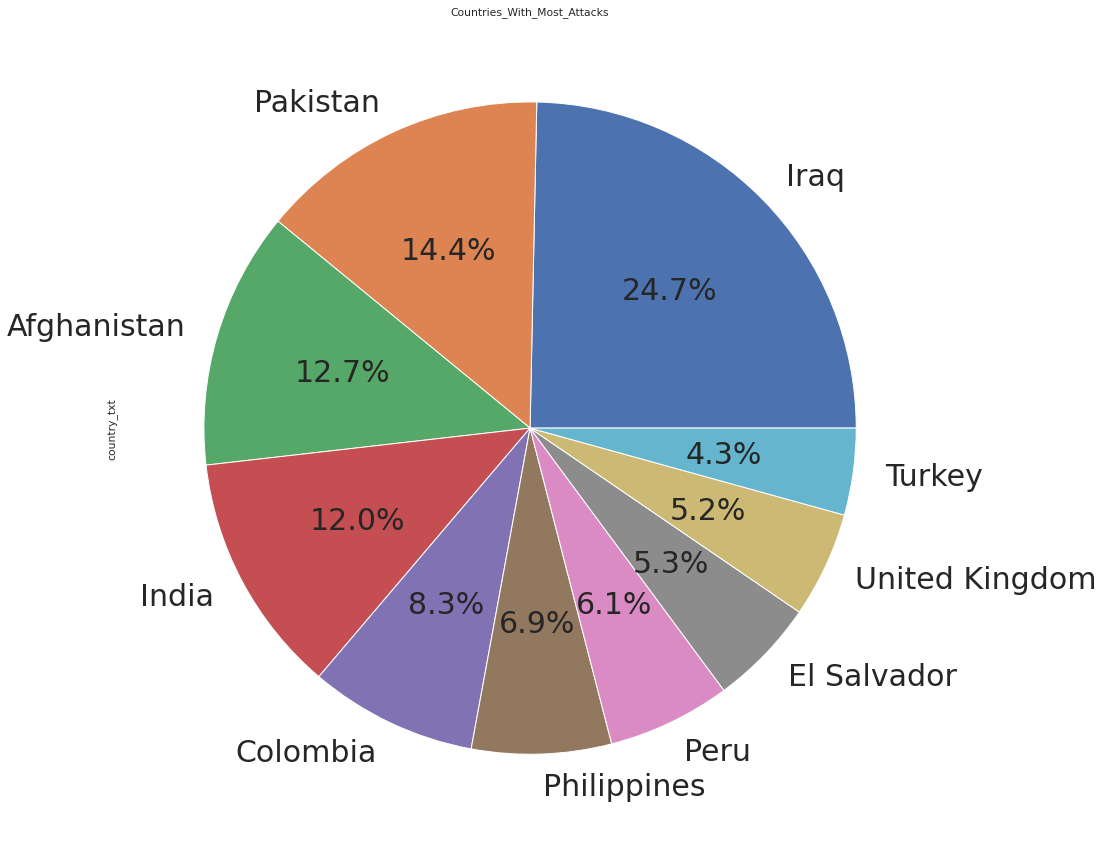

In [ ]:
#Plotting the Top 10 countries with most number of attacks
plt.figure(figsize=(15,15)) 
plt.title('Countries_With_Most_Attacks')
terror_attack_df_new['country_txt'].value_counts()[0:10].plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize':30})

**Analysis of Number One Attacked country Iraq.**

In [ ]:
#The below table shows the iraqs data 

iraq_attack = terror_attack_df_new[terror_attack_df_new['country_txt'] == 'Iraq']
iraq_attack.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound
2854,1975,3,1,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),B-737,Unknown,Unknown,0.0,1.0
4385,1976,12,15,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,1,0,Bombing/Explosion,Airports & Aircraft,Airport,Airport terminal,Unknown,Explosives,10.0,285.0
4393,1976,12,18,Iraq,Middle East & North Africa,Penjwon,NaN,NaN,1,0,Hostage Taking (Kidnapping),Government (General),"Government Personnel (excluding police, military)",agricultural experts in NE Iraq,Kurdish Democratic Party-Iraq (KDP),Unknown,0.0,0.0
4402,1976,12,24,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,1,0,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,Personnel,Unknown,Firearms,2.0,0.0
8688,1979,6,15,Iraq,Middle East & North Africa,Basra,30.510054,47.778095,1,0,Assassination,Government (General),Politician or Political Party Movement/Meeting...,local secretary,Unknown,Unknown,1.0,0.0


In [ ]:
# filling null values of nkill and nwound with zero and unknowncity with unknown

terror_attack_df['nkill']  = terror_attack_df['nkill'].fillna(0)
terror_attack_df['nwound']  = terror_attack_df['nwound'].fillna(0)
terror_attack_df['city']  = terror_attack_df['city'].fillna(0)


In [ ]:
# creating columns for city and nkill and nwounds
terror_attack_df_new['nkill'] = terror_attack_df['nkill']
terror_attack_df_new['nwound'] = terror_attack_df['nwound']
terror_attack_df_new['city'] = terror_attack_df['city']

In [ ]:
terror_attack_df_new.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,Explosives,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,Incendiary,0.0,0.0


**The Below analysis shows the number of Killings in the region and the country**

In [ ]:
Country_wise_killed = terror_attack_df_new[['country_txt','nkill']].groupby('country_txt').sum().sort_values(by='nkill',ascending = False)
Region_wise_killed = terror_attack_df_new[['region_txt','nkill']].groupby('region_txt').sum().sort_values(by='nkill',ascending = False)

In [ ]:
#getting the number of deaths happened country wise
Country_wise_killed

,nkill
country_txt,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
...,...
St. Kitts and Nevis,0.0
Martinique,0.0
Brunei,0.0


In [ ]:
#getting the number of deaths happened region wise

Region_wise_killed

,nkill
region_txt,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [ ]:
# Finding the number of wounded in the regionwise
Region_wise_Wounded = terror_attack_df_new[['region_txt','nwound']].groupby('region_txt').sum().sort_values(by='nwound',ascending = False)
Region_wise_Wounded

,nwound
region_txt,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


Text(0, 0.5, 'nwound')

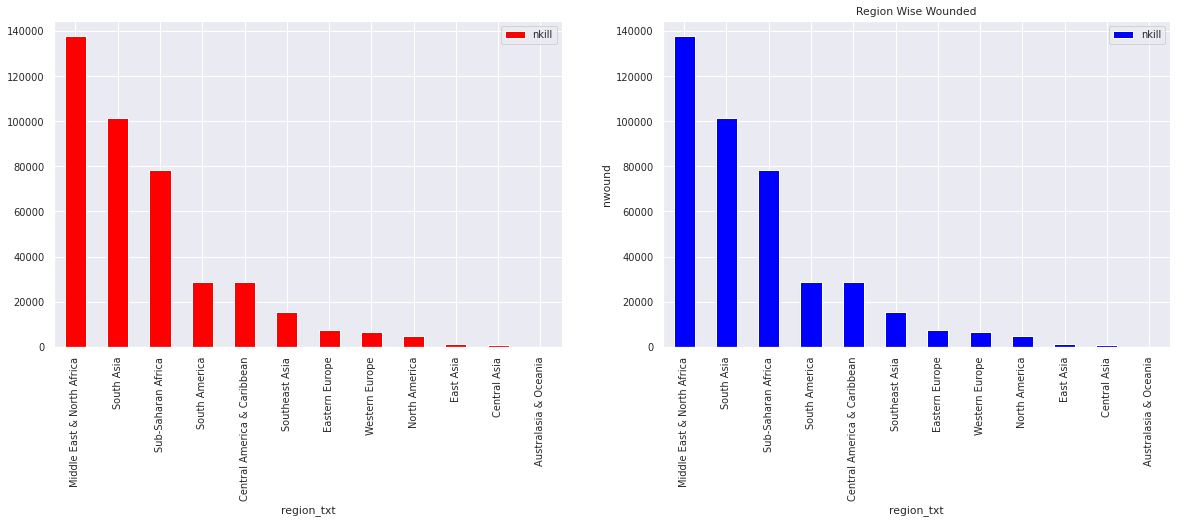

In [ ]:
# adding subplots
from IPython.core.pylabtools import figsize
figure = plt.figure()
ax0=figure.add_subplot(1,2,1)
ax1=figure.add_subplot(1,2,2)

#Graph for deaths in those regions
Region_wise_killed.plot(kind='bar',color='Red',figsize=(20,6),ax = ax0)
plt.title('Region Wise Deaths')
plt.xlabel('region_txt')
plt.ylabel('nkill')

#graph for wounded in those regions
Region_wise_killed.plot(kind='bar',color='Blue',figsize=(20,6),ax = ax1)
plt.title('Region Wise Wounded')
plt.xlabel('region_txt')
plt.ylabel('nwound')


From this chart we can find that middle east and north africa is the regions with most kills (**137642**) and most wounds (**214308**)

In [ ]:
#grouping the data by year wise killing and displaying top 10 years with most kills

year_wise_killing = terror_attack_df_new[['iyear','nkill']].groupby('iyear').sum().sort_values(by='nkill',ascending = False).rename(columns={'iyear':'year','nkill':'number of kills'})

year_wise_killing

,number of kills
iyear,
2014,44490.0
2015,38853.0
2016,34871.0
2017,26445.0
2013,22273.0
2012,15497.0
2007,12824.0
1997,10924.0
1984,10450.0


From the data above we can learn that year **2014** has been the year with most kills i.e **44490 kills**

In [ ]:
#grouping the data by year wise wounded and displaying top 10 years with most wounded

year_wise_wounded = terror_attack_df_new[['iyear','nwound']].groupby('iyear').sum().sort_values(by='nwound',ascending = False).rename(columns={'iyear':'year','nwound':'number of wounded'})

year_wise_wounded

,number of wounded
iyear,
2015,44043.0
2014,41128.0
2016,40001.0
2013,37688.0
2012,25445.0
2017,24927.0
2001,22774.0
2007,22524.0
2009,19138.0


Text(0.5, 1.0, 'Kills in each year')

<Figure size 1440x1080 with 0 Axes>

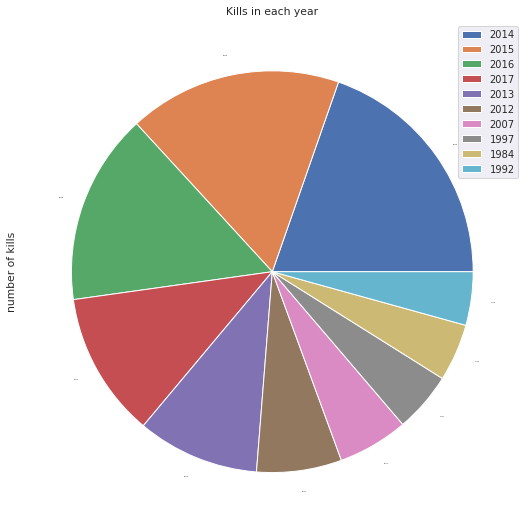

In [ ]:
plt.figure(figsize(20,15))
year_wise_killing[0:10].plot(kind='pie',textprops={'fontsize':2},subplots=True,figsize=(9,12))
plt.title('Kills in each year')

Text(0.5, 1.0, 'number of wounded people in each year')

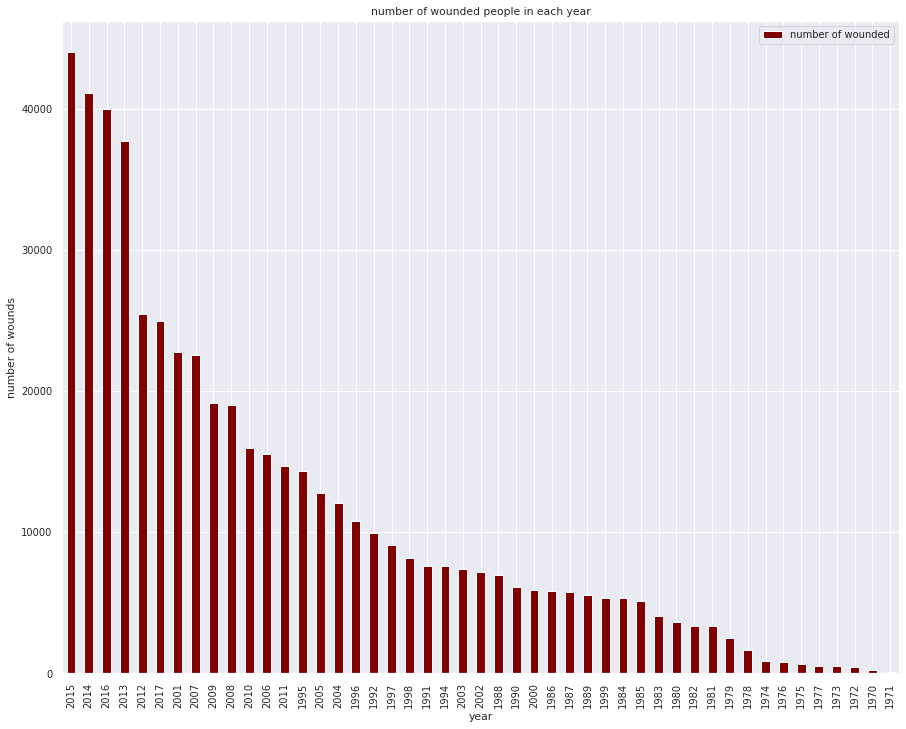

In [ ]:
year_wise_wounded.plot(kind='bar',color='maroon',figsize=(15,12))
plt.xlabel('year')
plt.ylabel('number of wounds')
plt.title('number of wounded people in each year')

This chart clearly shows that the year **2015** has the most wounds occured and remains as the top i.e **44043** wounds

**Detailed Analysis of weapon types terrorists used and insights about it**

In [ ]:
#finding most used weapons

type_of_weapon = terror_attack_df_new['weaptype1_txt'].value_counts().reset_index().rename(columns = {'index':'weapons','weaptype1_txt':'number of times used'})

type_of_weapon

,weapons,number of times used
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


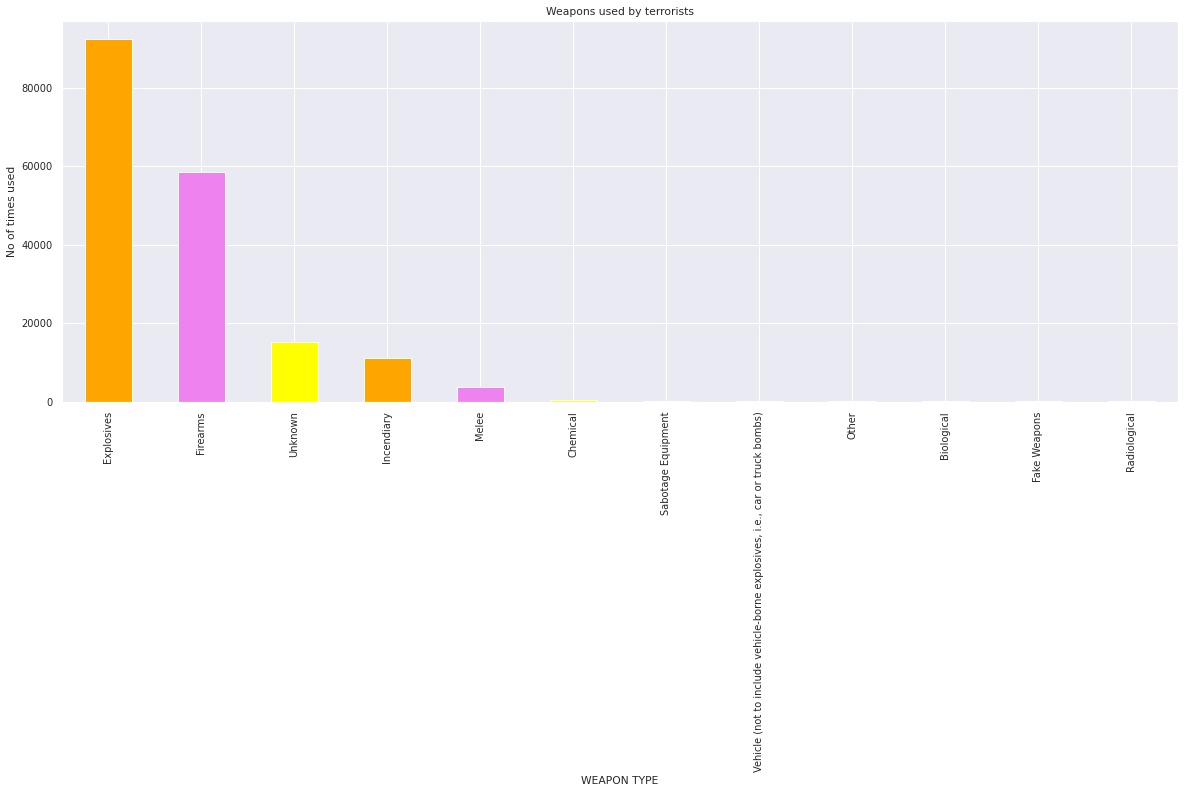

In [ ]:
#plotting of weapons used by terrorists mostly

plt.figure(figsize=(20,7))
terror_attack_df_new['weaptype1_txt'].value_counts().plot(kind='bar',color={'orange','yellow','violet'})


plt.title("Weapons used by terrorists")
plt.xlabel("WEAPON TYPE")
plt.ylabel("No of times used")
plt.show()

From the above data and charts we can conclude that **Explosives** are the most frequently used weapon **92426** times and **Radiological** weapons are the least used i.e **14** times

**Analysis of the target types of the terrorist attacks, on whom the terrorist attacks has been executed**

In [ ]:
#finding the frequently targetted types of terrorist attacks

target_types =terror_attack_df_new[['targtype1_txt']].value_counts()

target_types

targtype1_txt                 
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
dtype: int64

In [ ]:
#resetting the index and renaming the columns

target_types.reset_index().rename(columns={'targtype1_txt':'Target Type',0:'No. of times'})

,Target Type,No. of times
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

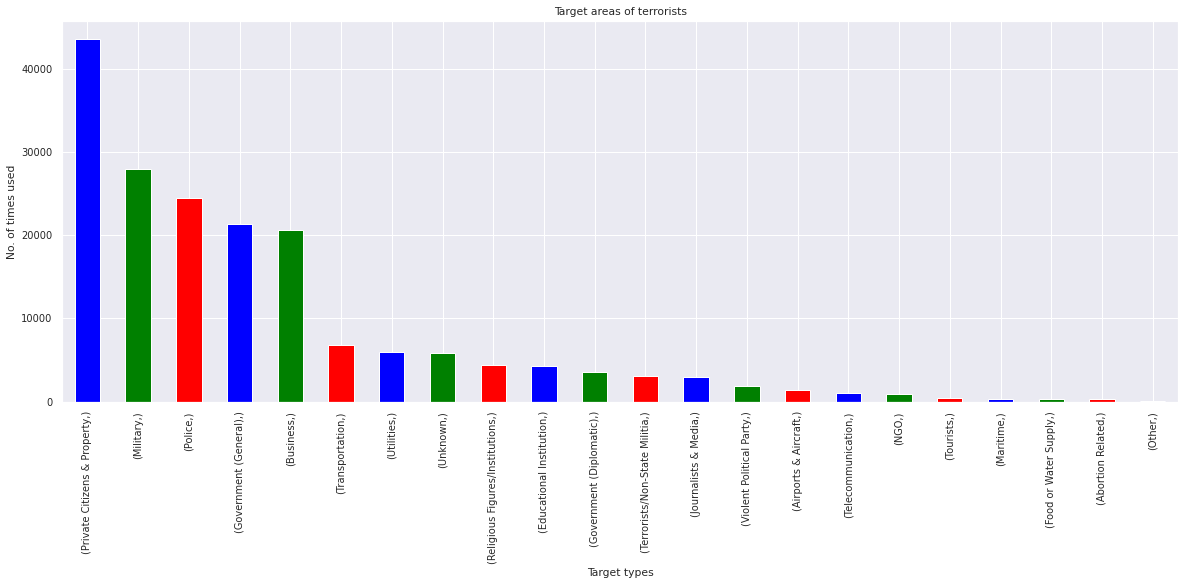

In [ ]:
#plotting of target areas of terrorists

plt.figure(figsize=(20,7))
target_types.plot(kind='bar',color={'red','blue','green'})

plt.title('Target areas of terrorists')
plt.xlabel('Target types')
plt.ylabel('No. of times used')
plt.xticks(rotation=90)

From this data and chart above we can clearly infer that **Private Citizens & Property** are the most targetted i.e **43511** times and **other unknown target type** is the least targetted **137 times**

**Analysis of region wise terrorist attacks**

In [ ]:
#storing the region wise attacks in a new dataframe

regional_attacks = terror_attack_df_new['region_txt'].value_counts()

regional_attacks.reset_index().rename(columns = {'index':'Regions','region_txt':'No of attacks'})

,Regions,No of attacks
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


In [ ]:
print('The Maximum number regional attacks are :',regional_attacks.max())
print('The Region in which maximum attacks took place :',regional_attacks.idxmax())
print('The Minimum number regional attacks are :',regional_attacks.min())
print('The Region in which minimum attacks took place :',regional_attacks.idxmin())


The Maximum number regional attacks are : 50474
The Region in which maximum attacks took place : Middle East & North Africa
The Minimum number regional attacks are : 282
The Region in which minimum attacks took place : Australasia & Oceania


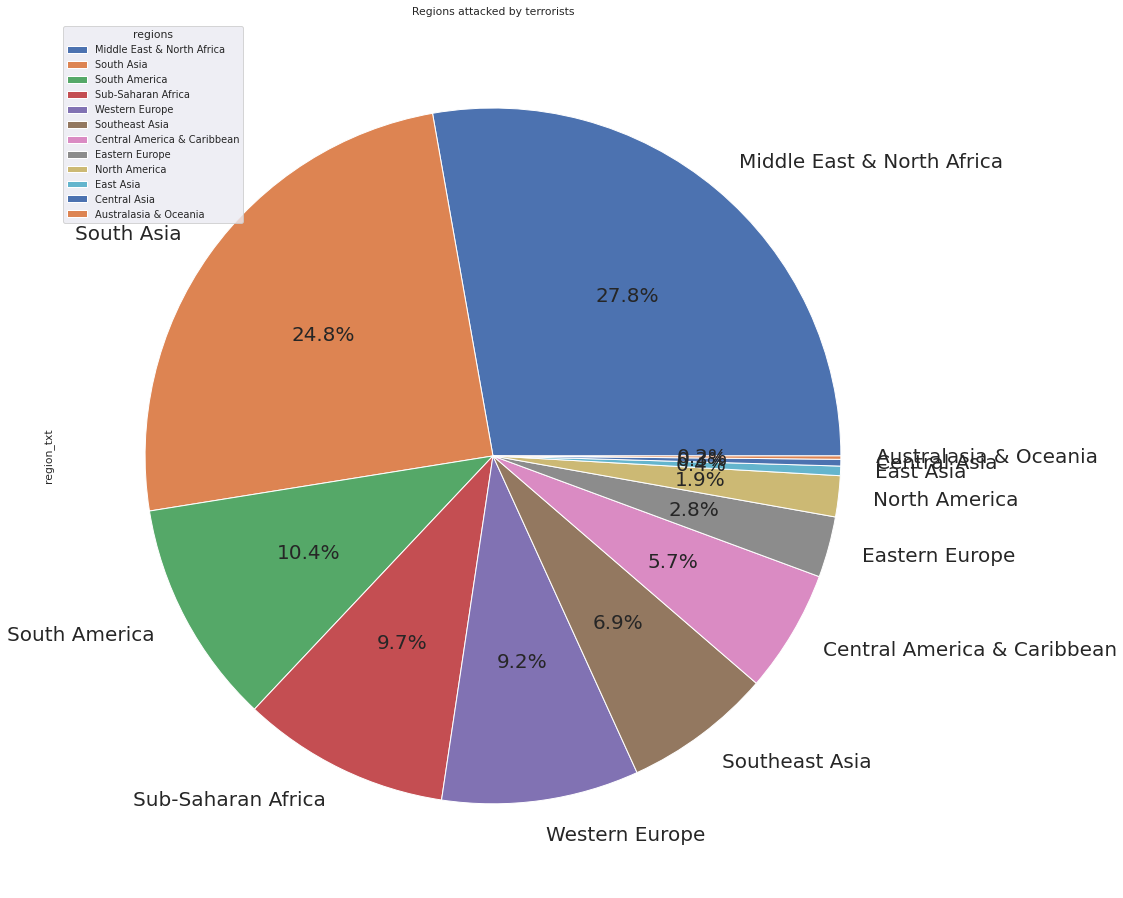

In [ ]:
#plotting of regions attacked by terrorists

fig, ax = plt.subplots(figsize =(10, 7))
regional_attacks.plot(kind="pie",figsize=(20,16),autopct='%1.1f%%',textprops={'fontsize':20})
ax.set_title('Regions attacked by terrorists')
ax.legend(title='regions',loc='upper left')

From the analyzed data and charts we can find that the most targeted region of terrorist attacks is the Middle east & North africa with **50474** attacks (27.8%) and least targeted region is **Australasia & Oceania** with **282 attacks** (0.2%)

**Analysis of cities attacked by the terrorists**

In [ ]:
# finding and counting terrorist attacked cities
city= terror_attack_df_new.city.value_counts()
city

Unknown                     9775
Baghdad                     7589
Karachi                     2652
Lima                        2359
Mosul                       2265
                            ... 
Sbet                           1
Sukirin                        1
Dehiattakandiya district       1
Oued-Djemaa                    1
Kubentog                       1
Name: city, Length: 36675, dtype: int64

In [ ]:
#resetting the index and renaming the columns

city.reset_index().rename(columns={'index':'city','city':'Number of attacks'})[0:10]

,city,Number of attacks
0,Unknown,9775
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171
6,Santiago,1621
7,Mogadishu,1581
8,San Salvador,1558
9,Istanbul,1048


Text(0.5, 1.0, 'Top 15 most attacked cities')

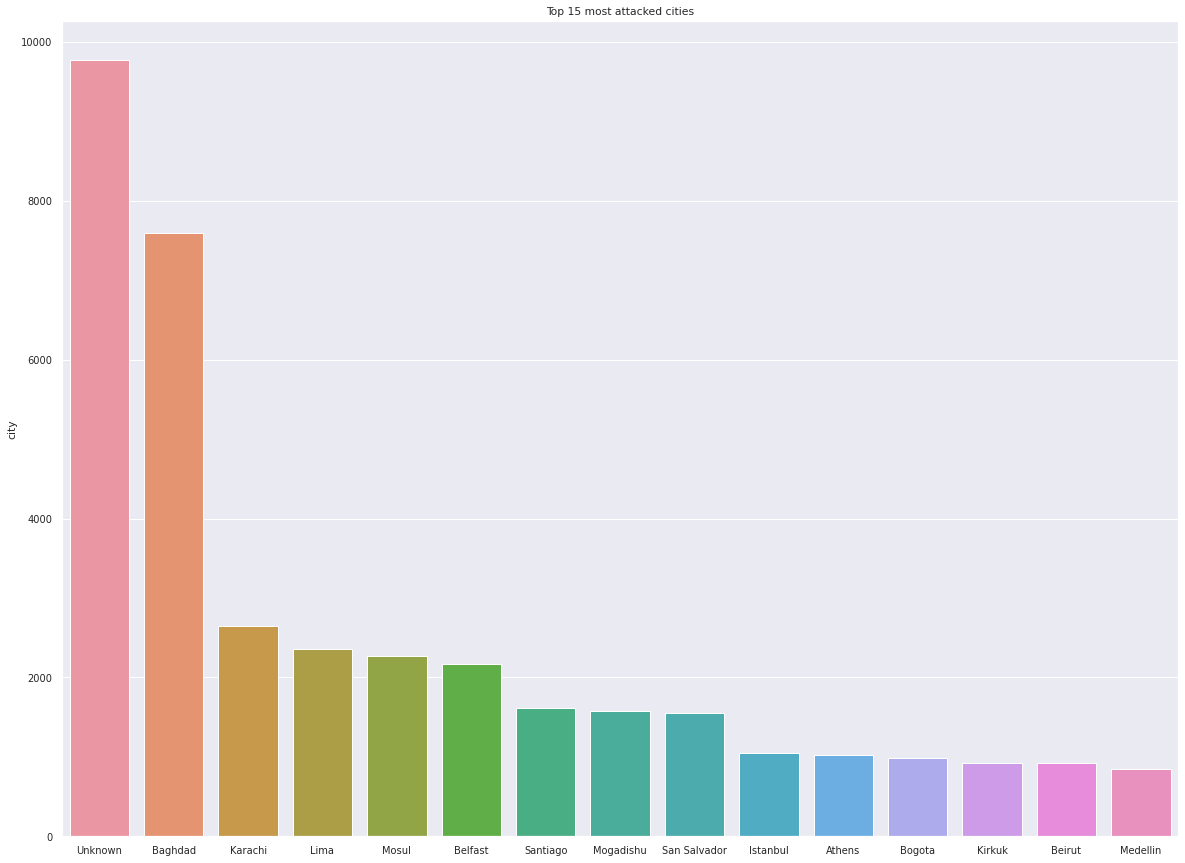

In [ ]:
#plotting of top 15 most attacked cities
plt.figure(figsize(20,15))
city = city.head(15)
sns.barplot(city.index,city).set_title('Top 15 most attacked cities')

The above analysis and charts show us that the Baghdad is the most attacked city with **7589 attacks** and **Benghazi** is the least attacked city with **840 attacks**

**Finding the type of attacks that the terrorists performed**

In [ ]:
# finding most frequent type of terrorist attacks
attack_types = terror_attack_df_new['attacktype1_txt'].value_counts()
attack_types

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [ ]:
print('The Most common attack type was :',attack_types.idxmax())
print('The minimum attack type used :',attack_types.idxmin())
print('The Maximum number of Bombing/Explosion Took place :',attack_types.max())
print('The minimum number of Hijacking Took place :',attack_types.min())


The Most common attack type was : Bombing/Explosion
The minimum attack type used : Hijacking
The Maximum number of Bombing/Explosion Took place : 88255
The minimum number of Hijacking Took place : 659


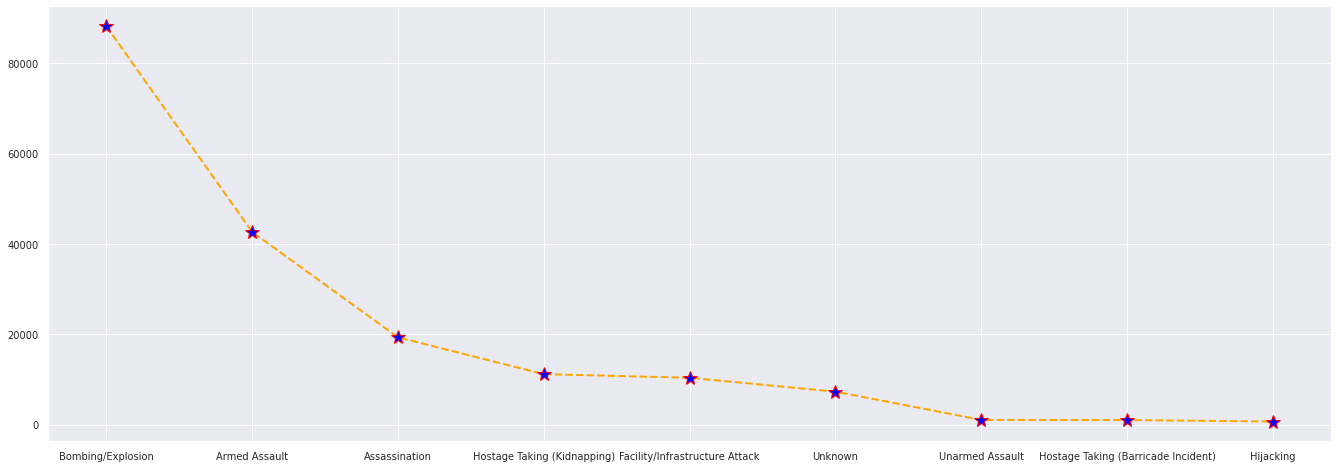

In [ ]:
#plotting of attack types by terrorists

plt.figure(figsize=(23,8))
attack_types.plot(kind="line",color='orange',ls='--',linewidth=2.00,marker='*',markersize=15,markeredgecolor='red',markerfacecolor='blue')

This analysis gives us the insights about the most frequently used attack types is the **Bombing/Explosion** with **88255** times and lowest used type is Hijacking with **659** times

**Analysis of suicides happened during the terrorist attacks**

In [ ]:
#storing the suicide data in a new dataframe suicide

suicide = terror_attack_df_new['suicide'].value_counts()
suicide.reset_index().rename(columns={'index':'Id','suicide':'No of Suicides'})

,Id,No of Suicides
0,0,175058
1,1,6633


Text(0.5, 1.0, 'Suicide during terrorist attacks')

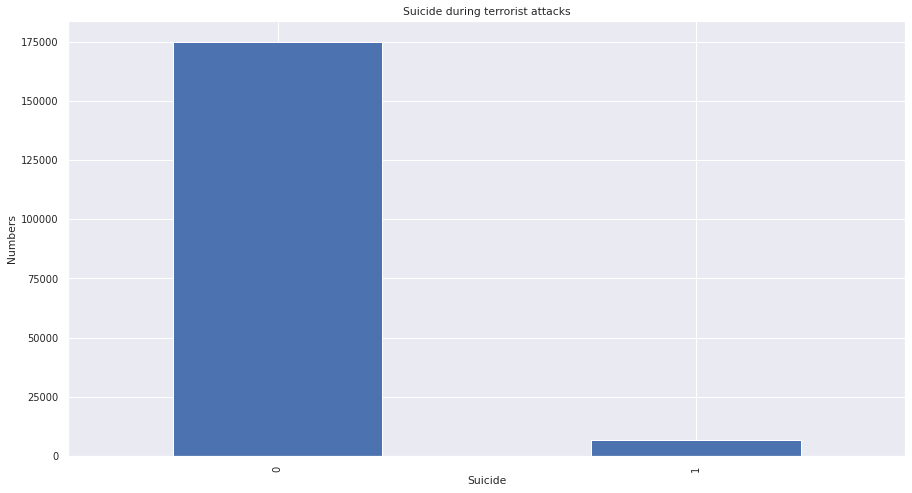

In [ ]:
#plotting of suicide during terrorist attacks

plt.figure(figsize=(15,8))
suicide.plot(kind='bar')
plt.xlabel('Suicide')
plt.ylabel('Numbers')

plt.title('Suicide during terrorist attacks')

From the above analysis we can learn that there are **6633** suicides happened during the terrorist attacks

**Analysis of Successful attacks by the terrorists**

In [ ]:
#storing the success data in a new dataframe success

success = terror_attack_df_new['success'].value_counts()
success

1    161632
0     20059
Name: success, dtype: int64

Text(0.5, 1.0, 'Success Rate of terrorist attacks')

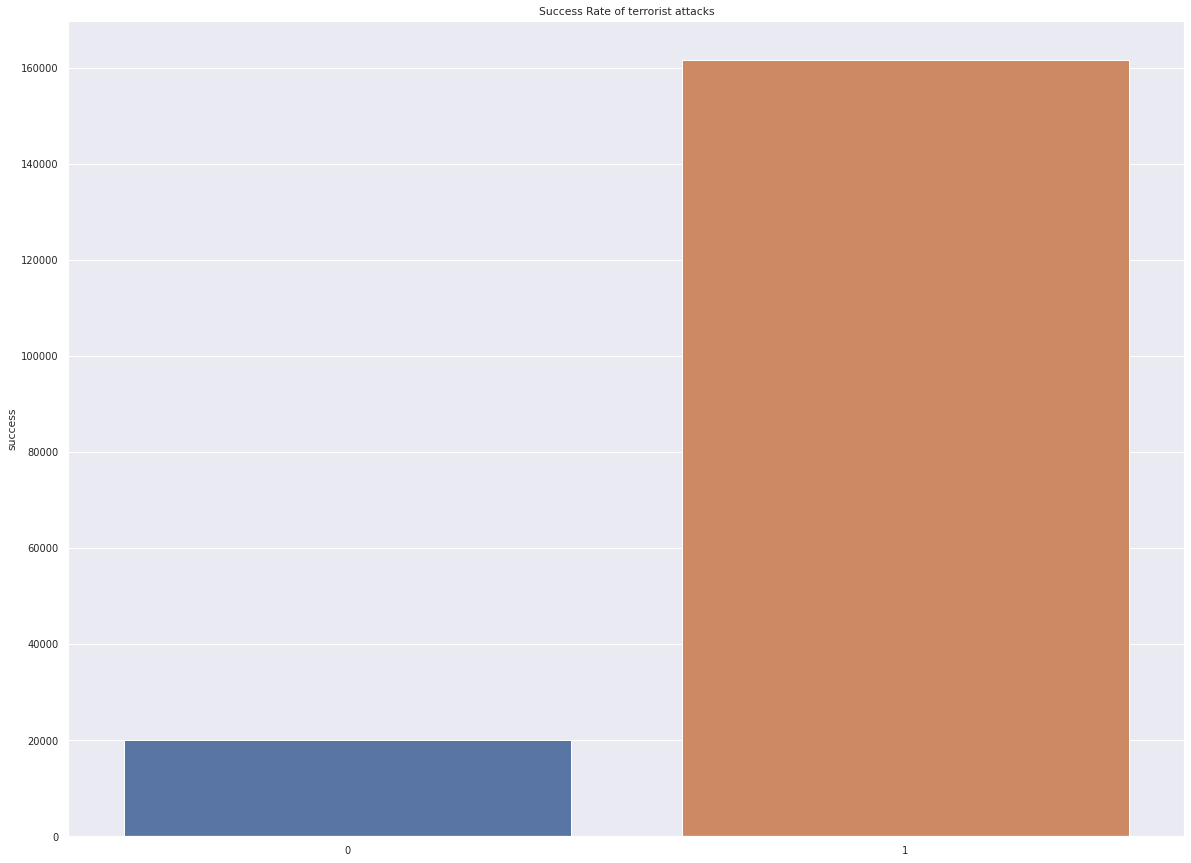

In [ ]:
#plotting of success rate of terrorist attacks

sns.barplot(success.index,success).set_title('Success Rate of terrorist attacks')

From the data and chart we can find that total **successful attacks** are **161632** attacks and the attacks went **unsuccessful** is **20059 attacks** of the total attacks held.

In [ ]:
s = terror_attack_df_new.groupby(['gname','weaptype1_txt'])

In [ ]:
s.first()

iyear  imonth  iday  \
gname                                 weaptype1_txt                        
1 May                                 Explosives      1989       4    10   
                                      Firearms        1989       1    23   
14 K Triad                            Incendiary      1998       5     8   
14 March Coalition                    Firearms        2008       7     9   
14th of December Command              Explosives      1990       5    14   
...                                                    ...     ...   ...   
Zulu Miners                           Unknown         1994       5     7   
Zuwar al-Imam Rida                    Firearms        2013       8     9   
Zviadists                             Firearms        1998       2    20   
Zwai Tribe                            Firearms        2013      12    21   
leftist guerrillas-Bolivarian militia Firearms        1995      10    29   

                                                      country_txt  \
gname                                 weaptype1_txt                 
1 May                                 Explosives           Greece   
                                      Firearms             Greece   
14 K Triad                            Incendiary            Macau   
14 March Coalition                    Firearms            Lebanon   
14th of December Command              Explosives            Chile   
...                                                           ...   
Zulu Miners                           Unknown        South Africa   
Zuwar al-Imam Rida                    Firearms            Lebanon   
Zviadists                             Firearms            Georgia   
Zwai Tribe                            Firearms              Libya   
leftist guerrillas-Bolivarian militia Firearms           Colombia   

                                                                     region_txt  \
gname                                 weaptype1_txt                               
1 May                                 Explosives                 Western Europe   
                                      Firearms                   Western Europe   
14 K Triad                            Incendiary                      East Asia   
14 March Coalition                    Firearms       Middle East & North Africa   
14th of December Command              Explosives                  South America   
...                                                                         ...   
Zulu Miners                           Unknown                Sub-Saharan Africa   
Zuwar al-Imam Rida                    Firearms       Middle East & North Africa   
Zviadists                             Firearms                     Central Asia   
Zwai Tribe                            Firearms       Middle East & North Africa   
leftist guerrillas-Bolivarian militia Firearms                    South America   

                                                                   city  \
gname                                 weaptype1_txt                       
1 May                                 Explosives                 Athens   
                                      Firearms                   Athens   
14 K Triad                            Incendiary                  Macao   
14 March Coalition                    Firearms                  Tripoli   
14th of December Command              Explosives               Santiago   
...                                                                 ...   
Zulu Miners                           Unknown        West Rand district   
Zuwar al-Imam Rida                    Firearms                   Beirut   
Zviadists                             Firearms                  Zugdidi   
Zwai Tribe                            Firearms                    Sarir   
leftist guerrillas-Bolivarian militia Firearms                 Medellin   

                                                      latitude   longitude  \
gname                           

In [ ]:
# Highest Weapon type used in these attacks and the number of kills taken place because of them
print("Most Attack Types:",terror_attack_df_new['attacktype1_txt'].value_counts().idxmax())

Most_Attack_Types=terror_attack_df_new['attacktype1_txt'].value_counts().idxmax()


DeathRate_weaponType = terror_attack_df_new[['weaptype1_txt','nkill']].groupby('weaptype1_txt').sum().sort_values(by='nkill',ascending = False)
DeathRate_weaponType.reset_index().rename(columns={'weaptype1_txt':'Weapon Type','nkill':'People Killed'})

Most Attack Types: Bombing/Explosion


,Weapon Type,People Killed
0,Firearms,174894.0
1,Explosives,174277.0
2,Unknown,42620.0
3,Melee,10575.0
4,Incendiary,5476.0
5,Vehicle (not to include vehicle-borne explosiv...,3184.0
6,Chemical,624.0
7,Other,123.0
8,Sabotage Equipment,83.0
9,Biological,9.0


**Analysis of the terrorist attacks in the year 2014 which is year with most number of terrorist attacks**

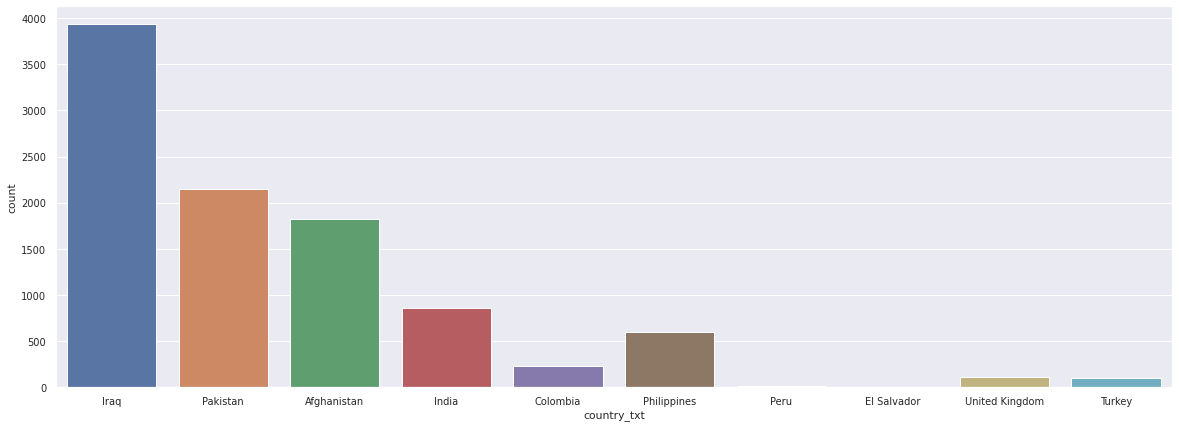

In [ ]:
#plotting country wise attacked data in 2014

plt.figure(figsize=(20,7))
year=terror_attack_df_new[terror_attack_df_new["iyear"]== 2014]
sns.countplot(x=year.country_txt, order=pd.value_counts(terror_attack_df_new["country_txt"]).iloc[:10].index)

In [ ]:
#min id of attacked country in 2014

year['country_txt'].value_counts().idxmin()

'Ghana'

In [ ]:
#min values of attacked country in 2014

year['country_txt'].value_counts().min()

1

From the above analysis we can find that in year 2014 , most attacked country is **Iraq** with **3933** attacks and least attacked country is **Ghana** with **1 attack.**

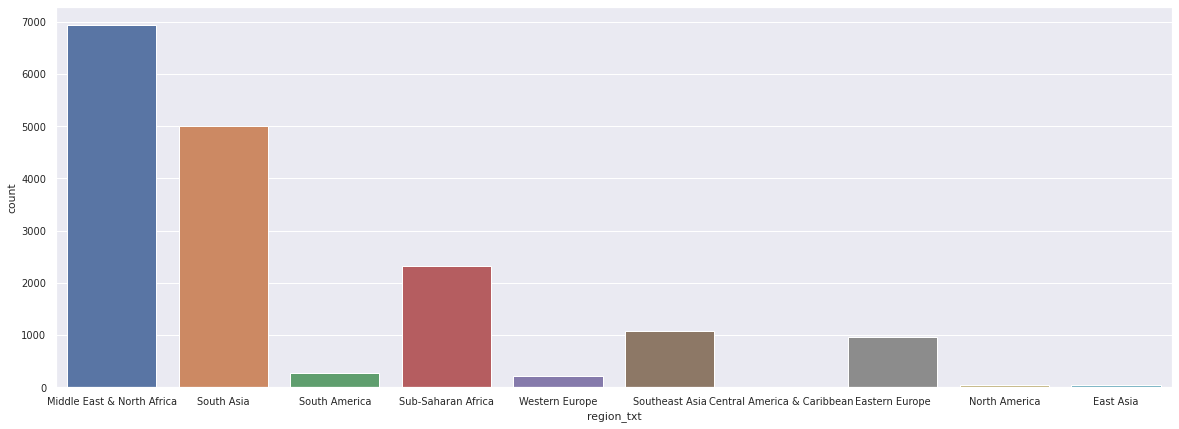

In [ ]:
# plotting of Region wise attacks in 2014

plt.figure(figsize=(20,7))
year=terror_attack_df_new[terror_attack_df_new["iyear"]== 2014]
sns.countplot(x=year.region_txt, order=pd.value_counts(terror_attack_df_new["region_txt"]).iloc[:10].index)

In [ ]:
#value counts of region wise attacks in 2014

year.region_txt.value_counts()

Middle East & North Africa     6939
South Asia                     4998
Sub-Saharan Africa             2321
Southeast Asia                 1082
Eastern Europe                  962
South America                   283
Western Europe                  215
East Asia                        43
North America                    37
Australasia & Oceania             9
Central Asia                      9
Central America & Caribbean       5
Name: region_txt, dtype: int64

In [ ]:
#min id of attacked region in 2014 

year['region_txt'].value_counts().idxmin()

'Central America & Caribbean'

In [ ]:
#min value of attacked region in 2014

year['region_txt'].value_counts().min()

5

This analysis shows us in 2014 the most attacked region is **Middle East & North Africa** with **6939 attacks** and **Central America & Caribbean** is the least attacked with 5 attacks

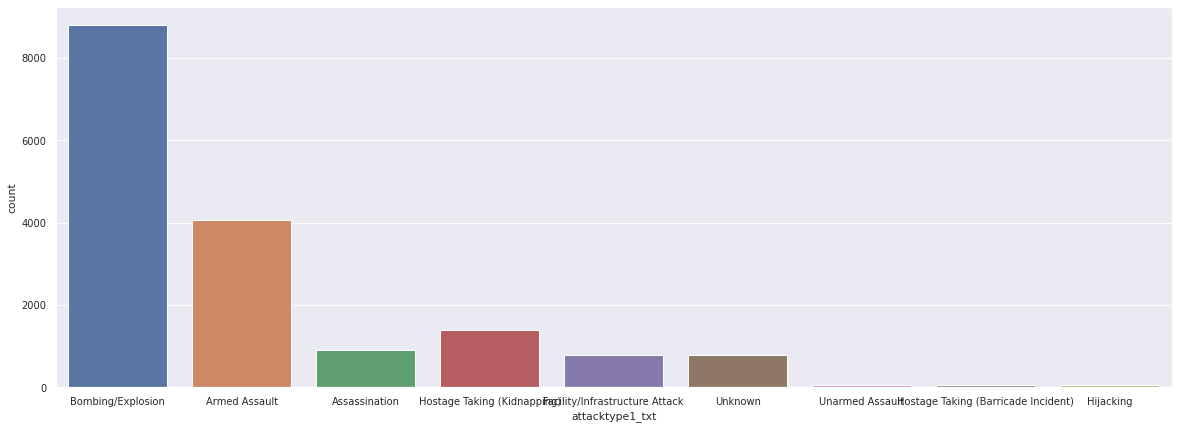

In [ ]:
#plotting attack type of terrorists in 2014

plt.figure(figsize=(20,7))
year=terror_attack_df_new[terror_attack_df_new["iyear"]== 2014]
sns.countplot(x=year.attacktype1_txt, order=pd.value_counts(terror_attack_df_new["attacktype1_txt"]).iloc[:10].index)

In [ ]:
#value counts of attack types

year.attacktype1_txt.value_counts()

Bombing/Explosion                      8799
Armed Assault                          4071
Hostage Taking (Kidnapping)            1397
Assassination                           920
Unknown                                 784
Facility/Infrastructure Attack          783
Unarmed Assault                          54
Hijacking                                49
Hostage Taking (Barricade Incident)      46
Name: attacktype1_txt, dtype: int64

In [ ]:
#min id of attack type

year['attacktype1_txt'].value_counts().idxmin()

'Hostage Taking (Barricade Incident)'

In [ ]:
#min value of attack type

year['attacktype1_txt'].value_counts().min()

46

From the analysis above we can conclude that **Bombing/Explosion** is the type of attack mostly used with **8799 attacks** and **Hostage Taking (Barricade Incident)** is the least used attack type with **46 attacks** in **2014**

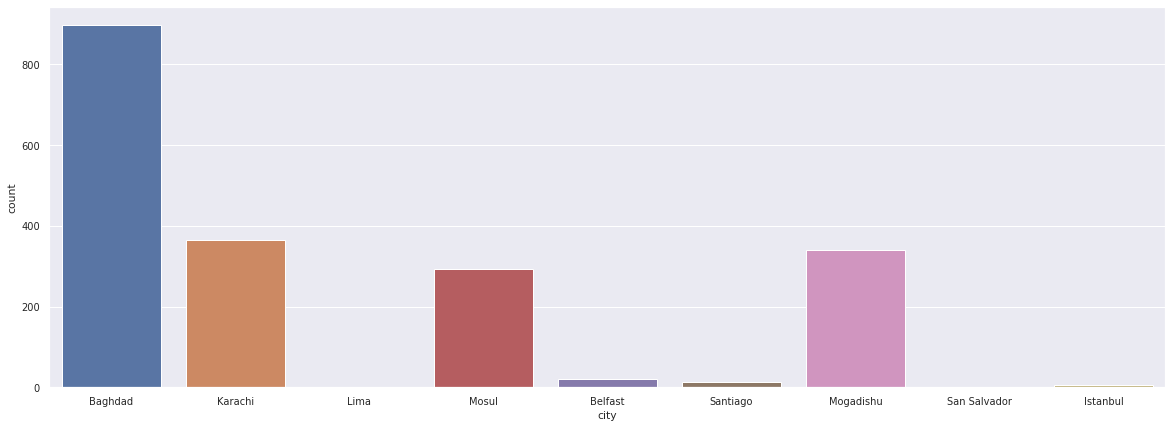

In [ ]:
#plotting city wise attacked data in 2014

plt.figure(figsize=(20,7))
year=terror_attack_df_new[terror_attack_df_new["iyear"]== 2014]
sns.countplot(x=year.city, order=pd.value_counts(terror_attack_df_new["city"]).iloc[1:10].index)

In [ ]:
#value counts of city wise attacked data

year.city.value_counts()

Baghdad          898
Unknown          800
Karachi          366
Benghazi         349
Mogadishu        339
                ... 
Bahaban            1
Nawafil            1
Burayj al-Rih      1
Malkhed            1
Lembah Napu        1
Name: city, Length: 5261, dtype: int64

The above analysis shows that the most attacked city is Baghdad with **898 attacks** in **2014**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

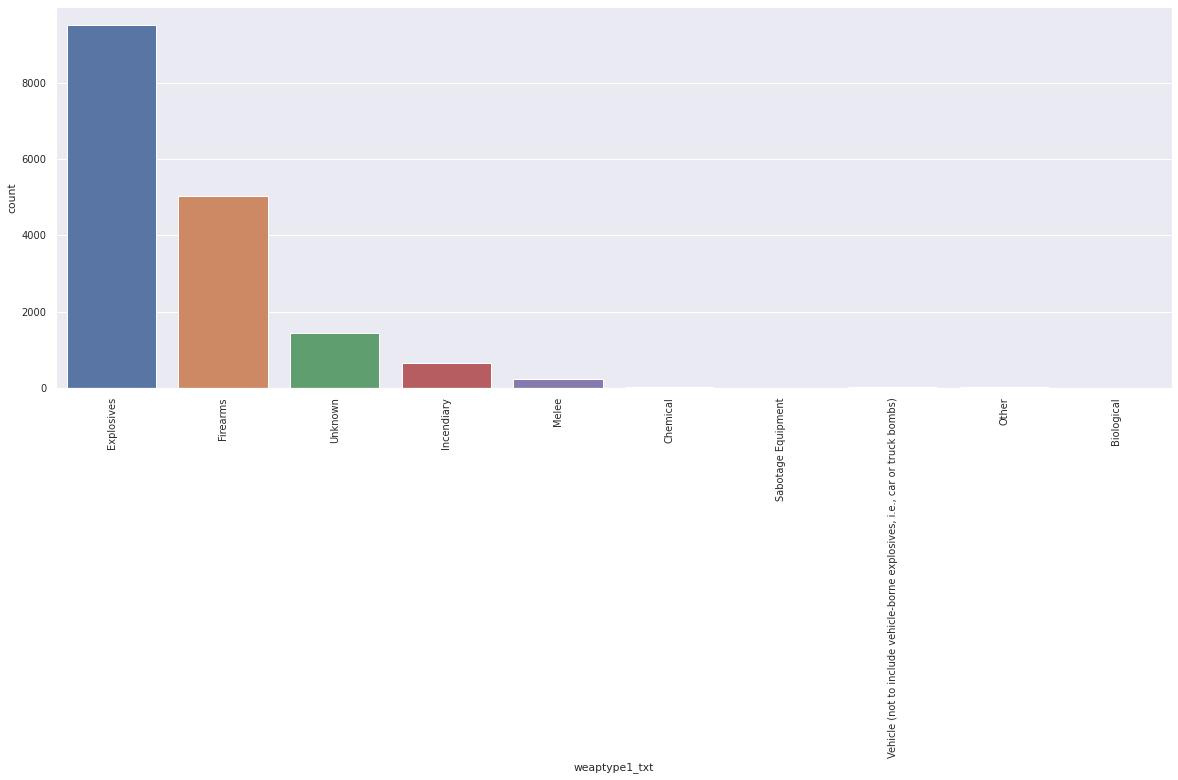

In [ ]:

#plotting weapon type used by terrorists in 2014
plt.figure(figsize=(20,7))
year=terror_attack_df_new[terror_attack_df_new["iyear"]== 2014]
sns.countplot(x=year.weaptype1_txt, order=pd.value_counts(terror_attack_df_new["weaptype1_txt"]).iloc[:10].index)
plt.xticks(rotation=90)

In [ ]:
#value counts of weapon types

year.weaptype1_txt.value_counts()

Explosives                                                                     9521
Firearms                                                                       5040
Unknown                                                                        1443
Incendiary                                                                      640
Melee                                                                           214
Chemical                                                                         18
Other                                                                            14
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      10
Fake Weapons                                                                      2
Sabotage Equipment                                                                1
Name: weaptype1_txt, dtype: int64

From this we infer that **Explosives** are the most used weapon type with 9521 times and **Sabotage Equipment** is the least used i.e **1 time** in year **2014**

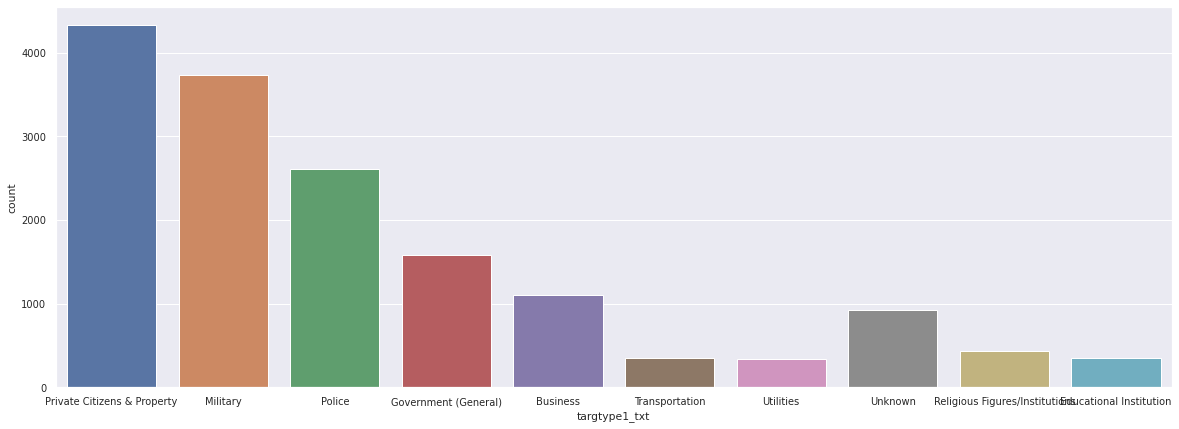

In [ ]:
#plotting target type by terrorists in 2014

plt.figure(figsize=(20,7))
year=terror_attack_df_new[terror_attack_df_new["iyear"]== 2014]
sns.countplot(x=year.targtype1_txt, order=pd.value_counts(terror_attack_df_new["targtype1_txt"]).iloc[:10].index)

In [ ]:
#value counts of target type 

year.targtype1_txt.value_counts()

Private Citizens & Property       4331
Military                          3736
Police                            2615
Government (General)              1584
Business                          1107
Unknown                            928
Religious Figures/Institutions     429
Terrorists/Non-State Militia       364
Transportation                     347
Educational Institution            346
Utilities                          340
Journalists & Media                231
Government (Diplomatic)            159
Violent Political Party            138
NGO                                 82
Airports & Aircraft                 60
Telecommunication                   48
Food or Water Supply                21
Other                               18
Maritime                            13
Tourists                             6
Name: targtype1_txt, dtype: int64

**In 2014 the most attacks targetted on Private Citizens & Property with 4331 attacks and least targetted are Tourists with 6 attacks**

**Analyzing and creating a terrorism dataframe of 2014**

In [ ]:
#creating new dataframes with top most value of country,region,attack type,city,weapon,target type in  year 2014

country_df = terror_attack_df_new[(terror_attack_df_new['country_txt']=='Iraq') & (terror_attack_df_new['iyear']==2014) ]

region_df = terror_attack_df_new[(terror_attack_df_new['region_txt']=='Middle East & North Africa') & (terror_attack_df_new['iyear']==2014)]

attacktype_df = terror_attack_df_new[(terror_attack_df_new['attacktype1_txt']=='Bombing/Explosion') & (terror_attack_df_new['iyear']==2014)]

city_df = terror_attack_df_new[(terror_attack_df_new['city']=='Baghdad') & (terror_attack_df_new['iyear']==2014)]

weapon_df = terror_attack_df_new[(terror_attack_df_new['weaptype1_txt']=='Explosives') & (terror_attack_df_new['iyear']==2014)]

targettype_df = terror_attack_df_new[(terror_attack_df_new['targtype1_txt']=='Private Citizens & Property') & (terror_attack_df_new['iyear']==2014)]

In [ ]:
#determining the shape of newly created dataframes
country_df.shape,region_df.shape,attacktype_df.shape,city_df.shape,weapon_df.shape,targettype_df.shape

((3933, 18), (6939, 18), (8799, 18), (898, 18), (9521, 18), (4331, 18))

In [ ]:
#concatenating the above dataframes into a new dataframe

terrorism_data_of_2014 = pd.concat([country_df,region_df,attacktype_df,city_df,weapon_df,targettype_df])

terrorism_data_of_2014.reset_index()

,index,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound
0,125340,2014,1,1,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,1,1,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Patrol,Unknown,Explosives,2.0,6.0
1,125341,2014,1,1,Iraq,Middle East & North Africa,Yathrib,33.994591,44.357273,1,0,Armed Assault,Military,Military Checkpoint,Checkpoint,Unknown,Firearms,2.0,3.0
2,125342,2014,1,1,Iraq,Middle East & North Africa,Tarmiyah,33.669689,44.381317,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Police Station,Muslim extremists,Firearms,4.0,12.0
3,125347,2014,1,1,Iraq,Middle East & North Africa,Fallujah,33.349159,43.784199,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Headquarters,Islamic State of Iraq and the Levant (ISIL),Firearms,0.0,0.0
4,125348,2014,1,1,Iraq,Middle East & North Africa,Fallujah,33.349159,43.784199,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Police Station,Islamic State of Iraq and the Levant (ISIL),Firearms,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34416,142232,2014,12,31,Ireland,Western Europe,Waterford,52.255039,-7.123080,1,0,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,House,Unknown,Incendiary,0.0,0.0
34417,142233,2014,12,31,West Bank and Gaza Strip,Middle East & North Africa,Yatta,31.444601,35.091068,1,0,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,House,Israeli settlers,Incendiary,0.0,0.0
34418,142237,2014,12,31,Indonesia,Southeast Asia,Lembah Napu,-1.753123,120.643559,1,0,Hostage Taking (Kidnapping),Private Citizens & Property,Unnamed Civilian/Unspecified,Civilian,Mujahidin Indonesia Timur (MIT),Unknown,1.0,0.0
34419,143507,2014,12,27,Afghanistan,South Asia,Saberi district,33.566561,69.878354,1,0,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians,Taliban,Explosives,5.0,0.0


**The Final Observations/Insights that we derive from the Global Terrorism Dataset using the Exploratory Data Analysis:**
1. **Attacks over years**: The year 2014 had the most number of terrorist attacks i.e 16903 attacks and the lowest number of attacks has happened in the year 1971 i.e 471 attacks.
2. **Terrorist groups** : Unknown group is the one which has done the most number of attacks 82728 with Taliban in the 2nd place of 7478 attacks.
3. **Countries attacked** : Iraq has been the country with the most number of attacks i.e 24636 and the least number of attacks held in 10 plus countries.
4. **Region wise killing and wounds** : Middle east and North africa is the regions with most kills (137642) and most wounds (214308).
5. **Year wise killing and wounds** : 2014 has been the year with most kills i.e 44490 kills and 2015 has the most wounds occured and remains as the top i.e 44043 wounds.
6. **Weapon types of terrorists** : Explosives are the most frequently used weapon 92426 times and Radiological weapons are the least used i.e 14 times.
7. **Target types of terrorists** : Private Citizens & Property are the most targetted i.e 43511 times and other unknown target type is the least targetted 137 times.
8. **Region wise attacks** : The most targeted region of terrorist attacks is the Middle east & North africa with 50474 attacks (27.8%) and least targeted region is Australasia & Oceania with 282 attacks (0.2%).
9. **City wise attacks** : Baghdad is the most attacked city with 7589 attacks and Benghazi is the least attacked city with 840 attacks.
10. **Attack types** : The most frequently used attack types is the Bombing/Explosion with 88255 times and lowest used type is Hijacking with 659 times.
11. **Suicides** : 6633 suicides happened during the terrorist attacks.
12. **Successful attacks** : Total successful attacks are 161632 attacks and the attacks went unsuccessful is 20059 attacks of the total attacks held.
13. **Year 2014 attacks (Most number of attacks)**: (i). Country: number of attacks are 3933 in “Iraq” (ii). Regions: number of attacks are 6939 in “Middle East & North Africa” (iii). Attack types: 8799 attacks by Bombing /Explosion is the most (iv) Target types: 4331 attacks over Private Citizens & Property (v) weapon type: 9521 Explosives are used (vi) City : The most attacked city is Baghdad with 898 attacks.